In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
import seaborn as sns

from figure_labeler import *
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">Carbon Footprint of Online Shopping in Brazil: A Geospatial Analysis</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***

In this section, a concise overview of the analysis is provided, focusing on the investigation of the carbon footprint of online shopping in Brazil. With the increasing prevalence of online shopping in the country, concerns about its environmental impact, particularly its carbon footprint, are rising. The analysis aims to explore the distribution of the carbon footprint across different regions of Brazil and its variation by state. Leveraging the Brazilian E-Commerce Public Dataset from Kaggle, which includes data on 100,000 orders made at an Olist store between 2016 and 2018, critical inquiries surrounding this issue are delved into. By examining customer and seller distributions, spatial clusters of carbon footprint, and online shopping patterns by state, the aim is to shed light on the complex dynamics of carbon emissions in the online shopping industry.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

In this section, the environmental challenges brought about by the fast expansion of online shopping in Brazil are discussed, highlighting the importance of grasping and reducing its carbon footprint. The surge in online shopping in Brazil brings environmental challenges like more carbon emissions from packaging, transportation, and energy use. It's important to understand how the carbon footprint is distributed across various regions and states to come up with effective plans to lessen its impact and encourage sustainability in the e-commerce industry.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***

In this section, the focus lies on the driving force behind the analysis, stressing the importance of tackling the environmental impacts of online shopping and advocating for sustainability within the e-commerce sector. With the boom in e-commerce transactions, it's crucial to address the environmental effects of online shopping, particularly its carbon footprint. By examining data from the Brazilian E-Commerce Public Dataset, the aim is to reveal insights into the geographical distribution of carbon emissions and pinpoint areas where intervention and optimization are possible. This analysis seeks to enlighten policymakers, businesses, and consumers about the environmental consequences of their online shopping habits, ultimately aiding in the adoption of sustainable practices in the e-commerce industry.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***

In this section, we introduce the Brazilian E-Commerce Public Dataset from Kaggle, containing information on 100,000 orders at an Olist store in Brazil from 2016 to 2018. It includes details like customer and seller locations, order status, product attributes, and geospatial data. 

*Click this for the dataset:* [Dataset Link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv)

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing
***


In [3]:
gdf_0 = gpd.read_file('gadm41_BRA_0.json')
gdf_1 = gpd.read_file('gadm41_BRA_1.json')
gdf_2 = gpd.read_file('gadm41_BRA_2.json')

In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [5]:
fl.table_caption("Brazil's Measured Geometry",
                 "Table displaying the acquired geometry measurement of Brazil")
gdf_0.head()

,GID_0,COUNTRY,geometry
0,BRA,Brazil,"MULTIPOLYGON (((-28.84820 -20.49770, -28.85030..."


In [6]:
fl.table_caption("Brazil's Measured Geometry",
                 "Table displaying the administrive divisions in Brazil")
gdf_1.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,BRA.1_1,BRA,Brazil,Acre,NA,NA,Estado,State,NA,BR.AC,BR-AC,"MULTIPOLYGON (((-68.40330 -11.05350, -68.40850..."
1,BRA.2_1,BRA,Brazil,Alagoas,NA,NA,Estado,State,NA,BR.AL,BR-AL,"MULTIPOLYGON (((-36.30040 -10.34660, -36.29380..."
2,BRA.3_1,BRA,Brazil,Amapá,NA,NA,Estado,State,NA,BR.AP,NA,"MULTIPOLYGON (((-51.21640 -0.11860, -51.23500 ..."
3,BRA.4_1,BRA,Brazil,Amazonas,Amazone,NA,Estado,State,NA,BR.AM,BR-AM,"MULTIPOLYGON (((-68.21990 -9.24280, -68.64720 ..."
4,BRA.5_1,BRA,Brazil,Bahia,Ba¡a,NA,Estado,State,NA,BR.BA,BR-BA,"MULTIPOLYGON (((-39.26270 -17.83960, -39.26710..."


In [7]:
fl.table_caption("Brazil's Measured Geometry",
                 "Table displaying the administrive municipality in Brazil")
gdf_2.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BRA.1.1_2,BRA,Brazil,BRA.1_1,Acre,NA,Acrelândia,NA,NA,Município,Municipality,1200013,NA,"MULTIPOLYGON (((-67.00090 -10.22910, -67.00230..."
1,BRA.1.2_2,BRA,Brazil,BRA.1_1,Acre,NA,AssisBrasil,NA,NA,Município,Municipality,1200054,NA,"MULTIPOLYGON (((-69.57420 -10.94520, -69.57700..."
2,BRA.1.3_2,BRA,Brazil,BRA.1_1,Acre,NA,Brasiléia,NA,NA,Município,Municipality,1200104,NA,"MULTIPOLYGON (((-69.41280 -10.93710, -69.41410..."
3,BRA.1.4_2,BRA,Brazil,BRA.1_1,Acre,NA,Bujari,NA,NA,Município,Municipality,1200138,NA,"MULTIPOLYGON (((-67.97680 -9.35270, -67.97800 ..."
4,BRA.1.5_2,BRA,Brazil,BRA.1_1,Acre,NA,Capixaba,NA,NA,Município,Municipality,1200179,NA,"MULTIPOLYGON (((-67.57860 -10.50270, -67.57930..."


In [8]:
orders.dropna(inplace=True)
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [9]:
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for i in date_cols:
  orders[i] = pd.to_datetime(orders[i])
  
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [10]:
products.dropna(inplace=True)
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [11]:
fl.table_caption("Numerical Shipment Information",
                 "Table displaying the numerical information about the shipment process.")

selected_columns = [
    'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'order_item_id', 'product_id',
    'product_weight_g','customer_id','customer_city', 
    'customer_state', 'customer_zip_code_prefix',
    'seller_zip_code_prefix', 'seller_city',
    'seller_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
    'geolocation_lng', 'geolocation_city', 'geolocation_state'
]

CF_data = pd.merge(orders, order_items, on='order_id')
CF_data = pd.merge(CF_data, customers, on='customer_id')
CF_data = pd.merge(CF_data, products, on='product_id')
CF_data = pd.merge(CF_data, sellers, on='seller_id')
CF_data = pd.merge(CF_data, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

CF_data = CF_data[selected_columns]

CF_data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_weight_g,...,customer_state,customer_zip_code_prefix,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,...,SP,3149,9350,maua,SP,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,...,SP,3149,9350,maua,SP,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,...,SP,3149,9350,maua,SP,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,...,SP,3149,9350,maua,SP,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,...,SP,3149,9350,maua,SP,3149,-23.580054,-46.586673,sao paulo,SP


In [12]:
population_size = len(CF_data)
print(f"Total Population Size: {population_size}")

Total Population Size: 16607954


In [13]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in stratified_split.split(CF_data, CF_data['customer_state']):
    stratified_sample = CF_data.loc[test_index]

In [14]:
sample_size = len(stratified_sample)
print(f"Stratified Sample Size: {sample_size}")

Stratified Sample Size: 1660796


In [15]:
fl.table_caption("Numerical Summary of Order Information",
                 "Table displaying the numerical information about the order process.")

stratified_sample.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_weight_g,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1660796,1660796,1660796,1660796,1660796,1.660796e+06,1.660796e+06,1.660796e+06,1.660796e+06,1.660796e+06,1.660796e+06,1.660796e+06
mean,2018-01-02 00:21:16.843700224,2018-01-02 10:34:18.617480704,2018-01-05 07:22:35.203956224,2018-01-14 06:00:30.741005824,2018-01-25 20:19:04.060558848,1.206909e+00,2.132836e+03,3.280399e+04,2.519798e+04,3.280399e+04,-2.197112e+01,-4.594935e+01
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000e+00,0.000000e+00,1.003000e+03,1.001000e+03,1.003000e+03,-3.660537e+01,-9.848412e+01
25%,2017-09-16 16:19:14,2017-09-16 22:05:37,2017-09-19 19:20:12,2017-09-27 17:51:27.500000,2017-10-06 00:00:00,1.000000e+00,3.000000e+02,1.314500e+04,6.790000e+03,1.314500e+04,-2.357753e+01,-4.764029e+01
50%,2018-01-20 13:59:56,2018-01-20 18:31:12,2018-01-24 11:13:02,2018-02-02 03:27:18,2018-02-16 00:00:00,1.000000e+00,7.000000e+02,2.397000e+04,1.392000e+04,2.397000e+04,-2.291118e+01,-4.645827e+01
75%,2018-05-04 17:53:30,2018-05-05 03:33:40,2018-05-08 11:30:00,2018-05-15 10:49:55,2018-05-28 00:00:00,1.000000e+00,1.825000e+03,3.840000e+04,3.019000e+04,3.840000e+04,-2.041413e+01,-4.335175e+01
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,2.100000e+01,4.042500e+04,9.998000e+04,9.973000e+04,9.998000e+04,4.216725e+01,-6.328200e+00
std,NaN,NaN,NaN,NaN,NaN,7.064778e-01,3.783470e+03,2.701248e+04,2.809886e+04,2.701248e+04,4.283793e+00,3.555293e+00


<a name="dat_expl"></a>
## Data Exploration
***

In this section, the Bivariate and Multivariate analysis of the variables, including Number of casualties and vehicles, Accident Severity, Road Surface Conditions, Vehicle Types, and Weather Conditions, will be covered.

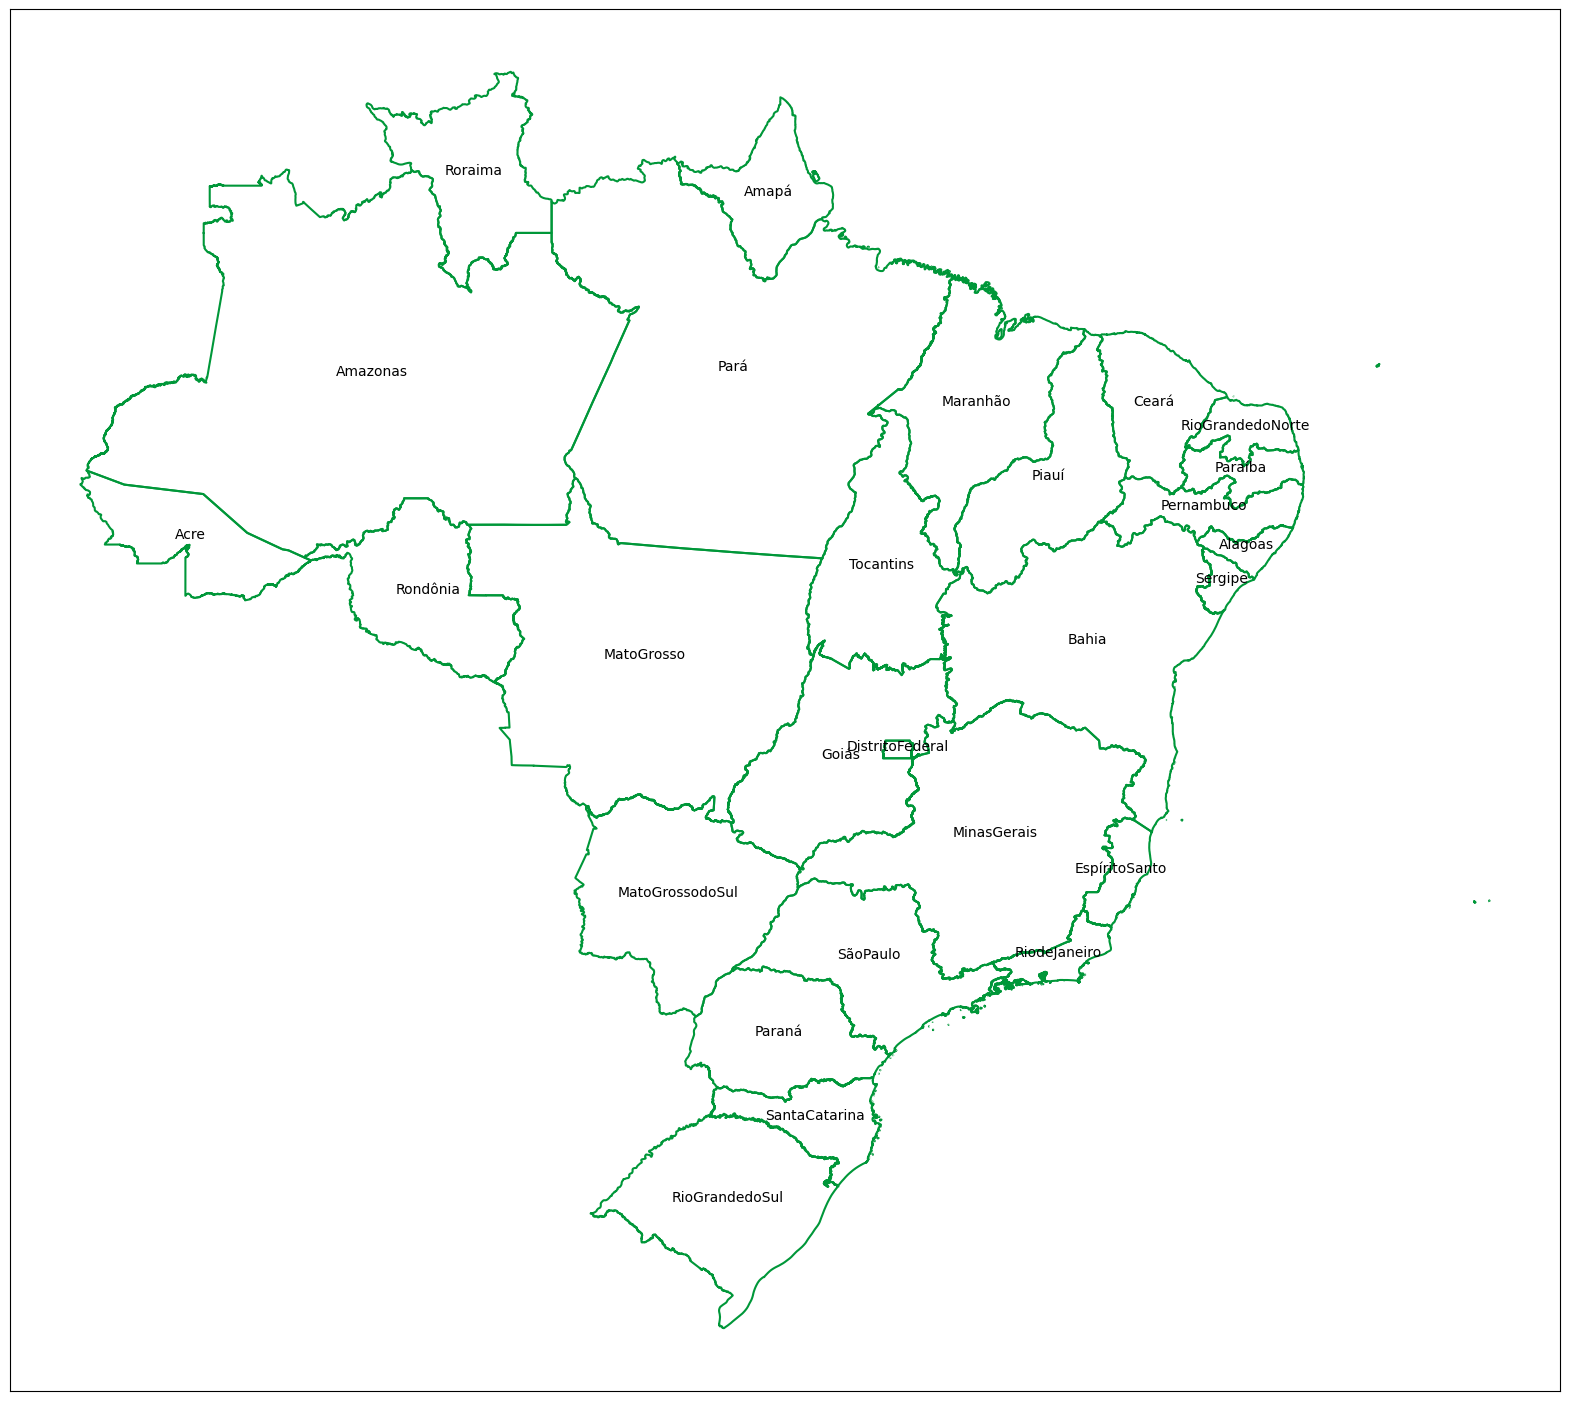

In [16]:
gdf_1.boundary.plot(figsize=(20, 20), color='#009739')
plt.xticks([])
plt.yticks([])

for index, row in gdf_1.iterrows():
    plt.annotate(text=row['NAME_1'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='black')
    
fl.fig_caption('Map of Brazil',
               'Map displaying the outlines of Brazil including its states.')

In [17]:
stratified_sample_customer_gdf = gpd.GeoDataFrame(stratified_sample, 
                                                  geometry=gpd.points_from_xy(stratified_sample.geolocation_lng, 
                                                                              stratified_sample.geolocation_lat)
                                                 )
stratified_sample_seller_gdf = gpd.GeoDataFrame(stratified_sample, 
                                                geometry=gpd.points_from_xy(stratified_sample.geolocation_lng, 
                                                                            stratified_sample.geolocation_lat)
                                               )

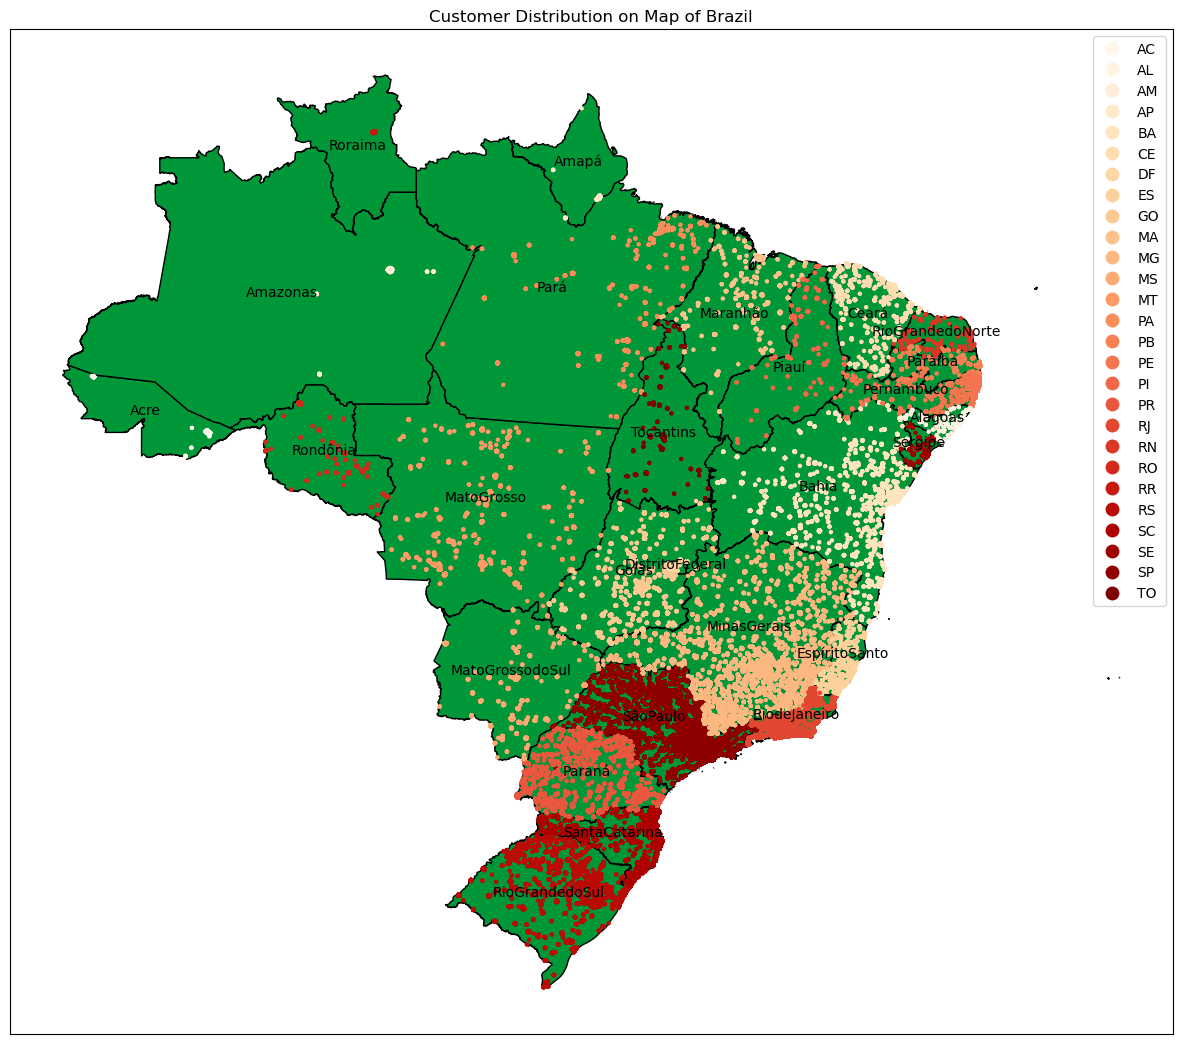

In [18]:
stratified_sample_customer_gdf = gpd.sjoin(stratified_sample_customer_gdf, 
                                           gdf_1, how='inner', 
                                           predicate='intersects')

fig, ax = plt.subplots(figsize=(15, 15))
gdf_1.plot(ax=ax, color='#009739', 
           edgecolor='black')
stratified_sample_customer_gdf.plot(ax=ax, column='customer_state', 
                                    legend=True, 
                                    markersize=5, 
                                    cmap='OrRd')
plt.title('Customer Distribution on Map of Brazil')
plt.xticks([])
plt.yticks([])

for index, row in gdf_1.iterrows():
    plt.annotate(text=row['NAME_1'], 
                 xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', 
                 color='black')

plt.show()

fl.fig_caption('Customer Distribution on Map of Brazil',
               'Map displaying the geographic lay out customers across Brazil.')

The displayed map shows the visualization of online shopping customer distribution across states in Brazil. São Paulo (SP), Minas Gerais (MG), and Rio de Janeiro (RJ) displaying dense clusters of customers, potentially reflecting higher urbanization and economic activity, which could correlate with increased carbon footprint due to heightened consumption and transportation emissions. 

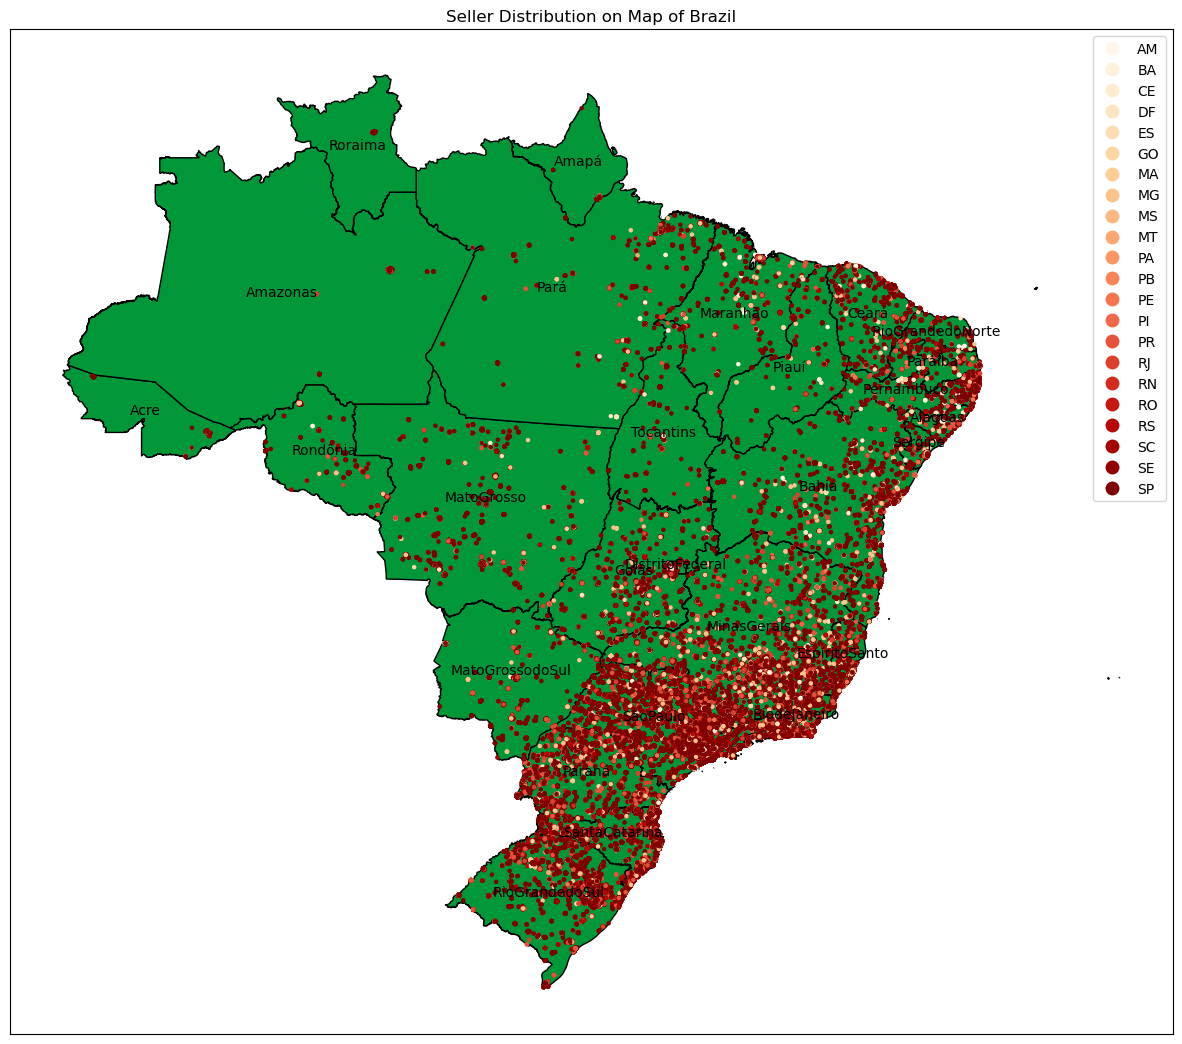

In [19]:
stratified_sample_seller_gdf = gpd.sjoin(stratified_sample_seller_gdf, 
                                         gdf_1, 
                                         how='inner', 
                                         predicate='intersects')

fig, ax = plt.subplots(figsize=(15, 15))
gdf_1.plot(ax=ax, color='#009739', 
           edgecolor='black')
stratified_sample_seller_gdf.plot(ax=ax, 
                                  column='seller_state', 
                                  legend=True, 
                                  markersize=5, 
                                  cmap='OrRd')
plt.title('Seller Distribution on Map of Brazil')
plt.xticks([])
plt.yticks([])

for index, row in gdf_1.iterrows():
    plt.annotate(text=row['NAME_1'], 
                 xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', 
                 color='black')
    
plt.show()

fl.fig_caption('Brazil’s Seller Distributions',
               'Map displaying seller distribution patterns across Brazil.')

The displayed map shows the analysis of seller distribution, which shows the distinct spatial patterns correlating the observed customer distribution. São Paulo (SP), Minas Gerais (MG), and Rio de Janeiro (RJ) emerging as major hubs, while states like Piauí (PI), Rondônia (RO), and Amazonas (AM) emphasizes a lower activity. This spatial correlation suggests a symbiotic relationship between customer and seller presence in online commerce.

In [20]:
stratified_sample_customer_gdf = gpd.GeoDataFrame(stratified_sample, 
                                                  geometry=gpd.points_from_xy(stratified_sample.geolocation_lng, 
                                                                              stratified_sample.geolocation_lat)
                                                 )
stratified_sample_seller_gdf = gpd.GeoDataFrame(stratified_sample, 
                                                geometry=gpd.points_from_xy(stratified_sample.geolocation_lng, 
                                                                            stratified_sample.geolocation_lat)
                                               )

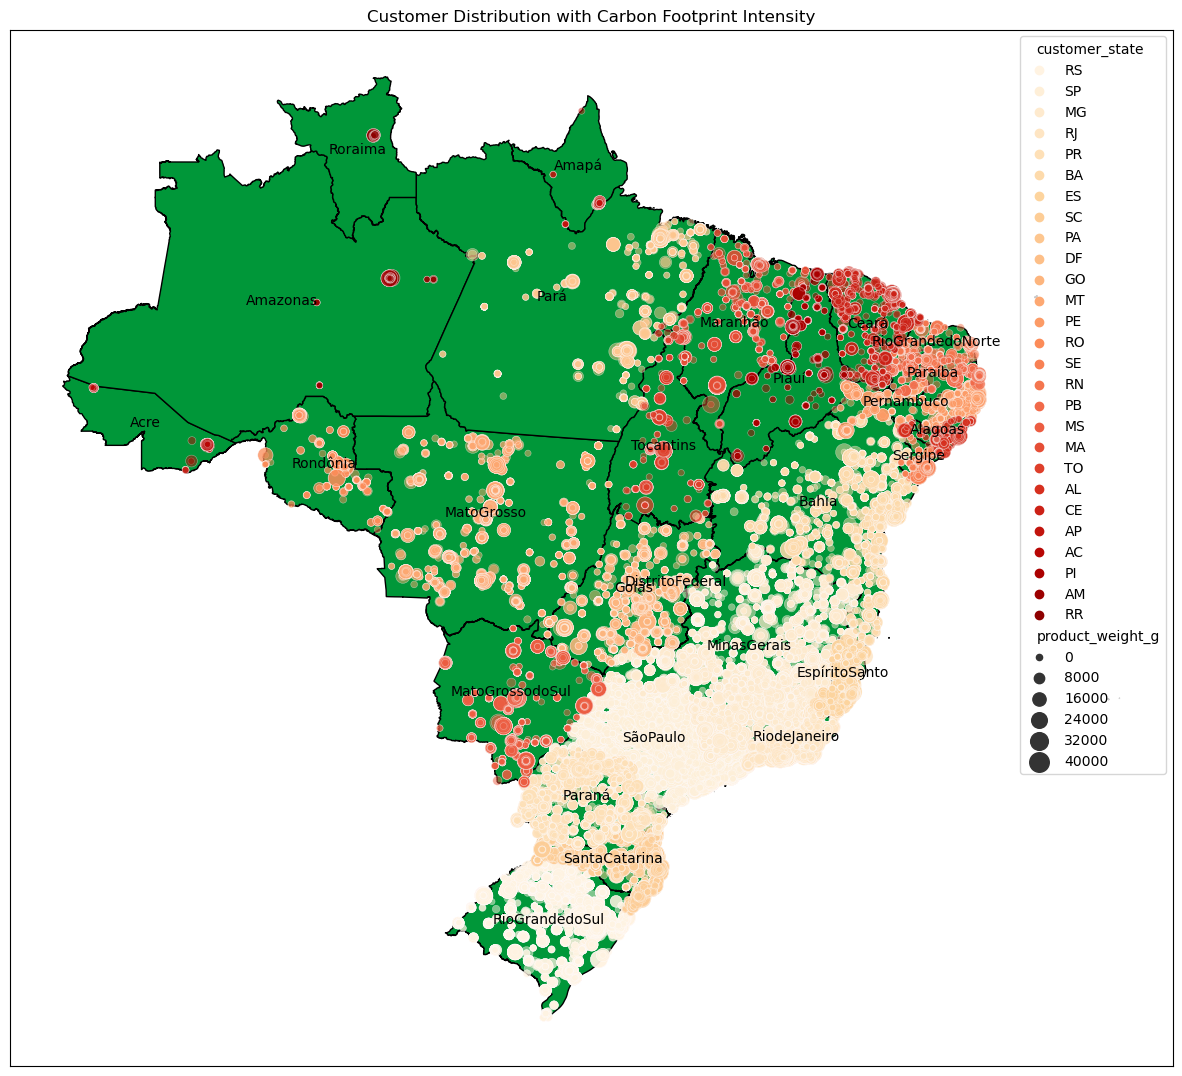

In [21]:
stratified_sample_customer_gdf.reset_index(drop=True, inplace=True)
gdf_1.reset_index(drop=True, inplace=True)

stratified_sample_customer_gdf = gpd.sjoin(stratified_sample_customer_gdf, 
                                           gdf_1, how='inner', 
                                           predicate='intersects')

plt.figure(figsize=(15, 15))
gdf_1.plot(ax=plt.gca(), color='#009739', edgecolor='black')
scatter = sns.scatterplot(x='geolocation_lng', y='geolocation_lat', 
                          hue='customer_state', palette='OrRd', 
                          size='product_weight_g', sizes=(20, 200), 
                          data=stratified_sample_customer_gdf, alpha=0.5)
scatter.set_title('Customer Distribution with Carbon Footprint Intensity')
scatter.set_xlabel(None)
scatter.set_ylabel(None)
scatter.set_xticks([])
scatter.set_yticks([])

for index, row in gdf_1.iterrows():
    plt.gca().annotate(text=row['NAME_1'], xy=row['geometry'].centroid.coords[0],
                       horizontalalignment='center', color='black')

plt.show()

fl.fig_caption('Spatial Clusters of Carbon Footprint on Map of Brazil',
               'Map displaying spatial clusters of the customers of carbon footprint in Brazil.')

The displayed map shows the spatial clusters of carbon footprint across geographic locations. The darker color emphasizes that there is a higher carbon foorprint intensity than any other states across Brazil.

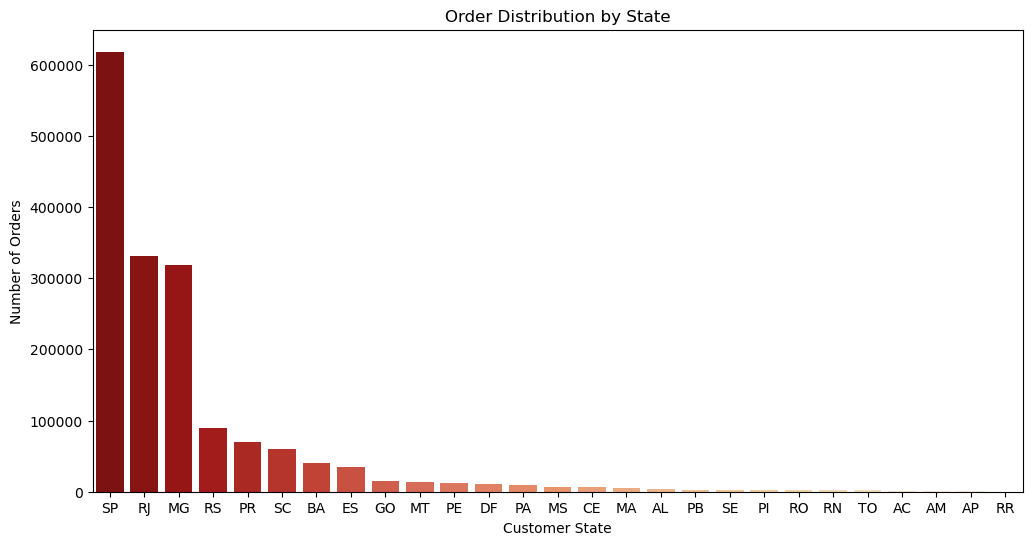

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_state', 
              data=stratified_sample, 
              order=stratified_sample['customer_state'].value_counts().index, 
              palette='OrRd_r')
plt.title('Order Distribution by State')
plt.xlabel('Customer State')
plt.ylabel('Number of Orders')
plt.show()

fl.fig_caption('Customer State Order Distribution',
               'Box plot displaying the online shopping distribution by state in Brazil.')

The displayed graph shows the variations in online shopping activity across Brazilian states, with the number of orders varies across states. São Paulo (SP) having the highest number of orders, with an exceeding count of 600,000 and Rio de Janeiro (RJ) follows with slightly above 300,000 orders.

<a name="res_dis"></a>
## Results and Discussions
***

**Customer Distribution on Map of Brazil:**
Major urban centers like São Paulo, Minas Gerais, and Rio de Janeiro boast a thriving online retail scene, likely fueled by high economic activity and a dense population. This concentration might translate to a larger carbon footprint due to increased consumption and delivery emissions. Conversely, states in the Amazon region like Amapá, Amazonas, and Acre show minimal online shopping activity, suggesting lower e-commerce adoption and potentially a smaller environmental impact. This uneven landscape highlights the need for targeted expansion strategies paired with sustainable logistics solutions to balance market growth with environmental responsibility across Brazil's diverse regions.

**Seller Distribution on Map of Brazil:**
Data on online sellers in Brazil mirrors customer distribution, with São Paulo, Minas Gerais, and Rio de Janeiro dominating due to high population density and economic activity. This concentration of both sellers and buyers in urban areas suggests a link between online commerce activity and its carbon footprint from deliveries. Higher demand in these regions likely leads to more deliveries and potentially higher emissions. Conversely, lower seller presence in states like Piauí, Rondônia, and Amazonas hints at less online commerce activity, potentially reducing the environmental impact. By strategically optimizing logistics based on these spatial patterns, Brazil can balance online market growth with minimizing the carbon footprint of online shopping.

**Customer Distribution with Carbon Footprint Intensity:**
This data visualization goes beyond location, plotting customer distribution across Brazil and layering estimated product weight. Bigger dots, concentrated in states like São Paulo (SP) and Minas Gerais (MG), likely represent heavier purchases and potentially higher carbon emissions from transportation. For example, SP covers a vast area with product weights around 160,000g, while Acre (AC) shows minimal activity and estimated product weights near 0g. This suggests a potential link between purchase weight, geographic distribution, and carbon footprint, highlighting the need for further research to confirm this connection.

**Order Distribution by State:**
Brazil's online shopping landscape is far from uniform. A stark contrast exists between bustling states like São Paulo (SP) with over 600,000 orders and Rio Grande do Norte (RN), Rondônia (RO), and Piauí (PI) with minimal activity. This geographic divide likely reflects consumer behavior and economic disparities. High order volumes in developed areas like SP and Rio de Janeiro (RJ) suggest a potentially larger carbon footprint due to transportation needs. Conversely, lower order counts in less developed states could signify less reliance on online shopping, potentially reducing their environmental impact. This highlights the need to consider regional variations when analyzing and mitigating the environmental cost of e-commerce across Brazil.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

Analysis of online shopping data in Brazil exposes a clear geographic divide. High economic activity and population density in major cities like São Paulo and Rio de Janeiro correlate with intense online retail activity. This seller-buyer concentration suggests a potential link to a larger carbon footprint due to increased delivery emissions. Conversely, states with lower economic activity, particularly in the Amazon region, show minimal online shopping, potentially leading to a smaller environmental impact. Furthermore, data suggests a correlation between purchase weight and geographic distribution, with areas experiencing higher order volumes potentially having heavier purchases and consequently a larger carbon footprint. To navigate this e-commerce landscape, *Brazil requires targeted expansion strategies alongside sustainable logistics solutions* that consider regional economic disparities and potentially mitigate the environmental impact of online shopping across the country.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

*Brazilian E-Commerce Public Dataset by OLIST. (2021, October 1). Kaggle. https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv*

[ref]: #top
[Back to Table of Contents][ref]

***
***